# Supervised ML - Simple Linear Regression - Newspaper data

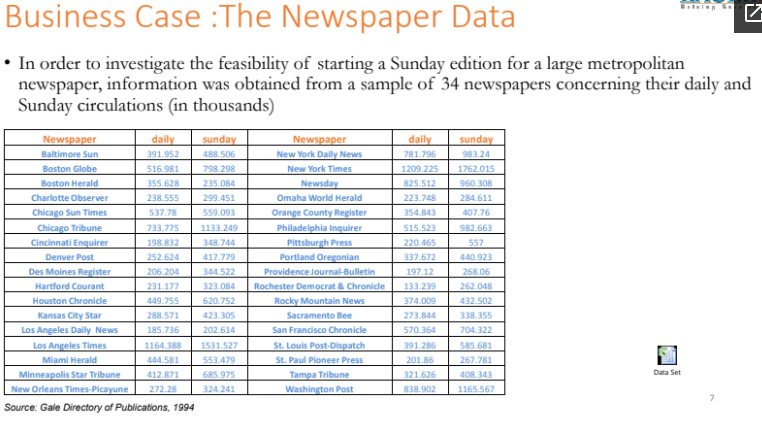

In [2]:
# import libraries
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

In [4]:
# import dataset
ndata=pd.read_csv('Database/NewspaperData.csv')
ndata

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


## EDA and Visualization

In [6]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


C:\Users\Hitesh Koli\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


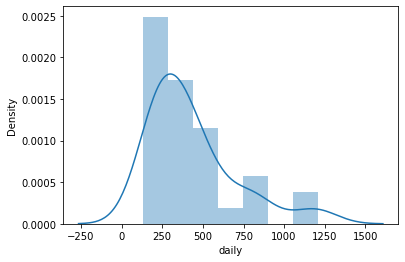

In [7]:
sns.distplot(ndata['daily'])

C:\Users\Hitesh Koli\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


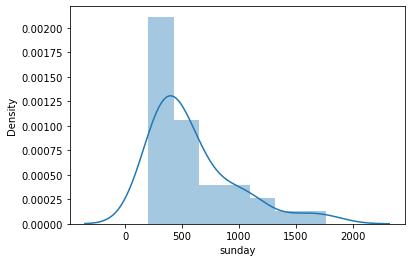

In [9]:
sns.distplot(ndata['sunday'])

## Correlation Analysis

In [10]:
# Finding the Correlation coefficient
ndata.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


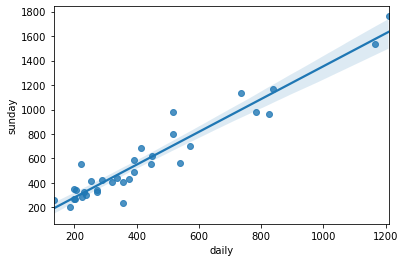

In [13]:
# Visualization of Correlation beteen x and y
sns.regplot(x=ndata['daily'],y=ndata['sunday'])  # regplot = regression plot

## Model Building

In [29]:
# Fitting a Linear Regression Model
# model = smf.ols("y~x",data=defined_data).fit()   ; ols= ordinary least square method

In [27]:
model=smf.ols("sunday~daily",data=ndata).fit() 

## Model Testing

In [40]:
# as Y = Beta0 + Beta1*(X)

In [41]:
# Finding Coefficient Parameters (Beta0 and Beta1 values)
model.params 

Intercept    13.835630
daily         1.339715
dtype: float64

In [42]:
# Here, (Intercept) Beta0 value = 13.8356 & (daily) Beta1 value = 1.3397

In [31]:
# Hypothesis testing of X variable by finding t_values and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)
# Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

In [46]:
print(model.tvalues,'\n',model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [35]:
# (Intercept) Beta0: tvalue=0.386427 , pvalue=7.017382e-01
# (daily)     Beta1: tvalue=18.934840, pvalue= 6.016802e-19
# As (pvalue=0)<(α=0.05); Reject Null hyp. Thus, X(daily) variable has good slope and variance w.r.t Y(sunday) variable. 

In [ ]:
# R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.

In [48]:
# Measure goodness-of-fit by finding rsquared values (percentage of variance)
model.rsquared,model.rsquared_adj 

(0.9180596895873295, 0.9154990548869336)

In [49]:
# Determination Coefficient = rsquared value = 0.9180 ; very good fit = 91.80%

## Model predictions

In [47]:
# Manual check
sunday = 13.8356 + (1.3397)*(200) # say; daily circulation is 200 thousands
sunday

281.7756

In [52]:
# Automatic prediction for say 200 and 300 daily circulations
new_data=pd.Series([200,300])
new_data

0    200
1    300
dtype: int64

In [54]:
data_pred=pd.DataFrame(new_data,columns=['daily'])
data_pred

,daily
0,200
1,300


In [55]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64